In [19]:
import numpy as np
import pandas as pd
import obspy as op
%matplotlib inline

In [2]:
from calculate_features_DAS import * 

In [4]:
#load example stream
test_stream = op.read("channel_85_clipped.mseed",format='mseed')

In [5]:
time = 2 #length of time to calculate features over
tinc = test_stream[0].stats.delta
window = int(time/tinc) #number of samples per unit time
npts = int(test_stream[0].stats.npts)

In [6]:
#merge stream into a single trace
test_stream.merge(fill_value=np.NaN)

1 Trace(s) in Stream:
FB.00085.00.FON | 2016-09-03T00:00:05.298907Z - 2016-09-10T00:00:14.323907Z | 40.0 Hz, 24192362 samples

In [9]:
#Build feature vectors
ltrace = npts-window
sma_1_comps = np.empty(ltrace)
means = np.empty(ltrace)
medians = np.empty(ltrace)
iqrs = np.empty(ltrace)
minmaxs = np.empty(ltrace)
variances = np.empty(ltrace)
stds = np.empty(ltrace)
mads = np.empty(ltrace)
rmss = np.empty(ltrace)
skews = np.empty(ltrace)
kurtosiss = np.empty(ltrace)
k2s = np.empty(ltrace)
Xcrossings = np.empty(ltrace)
cavs = np.empty(ltrace)
Zs = np.empty(ltrace)
energys = np.empty(ltrace)
time_vector = np.empty(ltrace)

In [8]:
sma_1_comps[:] = np.nan
means[:] = np.nan
medians[:] = np.nan
iqrs[:] = np.nan
minmaxs[:] = np.nan
variances[:] = np.nan
stds[:] = np.nan
mads[:] = np.nan
rmss[:] = np.nan
skews[:] = np.nan
kurtosiss[:] = np.nan
k2s[:] = np.nan
Xcrossings[:] = np.nan
cavs[:] = np.nan
Zs[:] = np.nan
energys[:] = np.nan
time_vector[:] = np.nan

In [10]:
#slide the window and extract data
trace = test_stream[0].data
time__ = np.linspace(0,time,window)
for i in range(ltrace):
    inslice = trace[i:i+window]
    time_vector[i] = i*tinc + time/2 #time corresponding to the middle of the trace
    if not np.isnan(inslice).any():
        #try:
        sma_1_comps[i], means[i], medians[i], iqrs[i],\
    minmaxs[i], variances[i], stds[i], mads[i], rmss[i],\
    skews[i], kurtosiss[i], k2s[i], Xcrossings[i], cavs[i],\
    Zs[i], energys[i] = features_rt(time__,inslice)
        #except:
        #    print("Error calculating features at step %i" %i)

In [11]:
df = pd.DataFrame(data={'time':time_vector,'sma_1':sma_1_comps,'mean':means,'medians':medians,'iqr':iqrs,'minmax':minmaxs,'variance':variances,
                       'std':stds,'mads':mads,'rms':rmss,'skew':skews,'kurtosis':kurtosiss,'k2s':k2s,'xcs':Xcrossings,
                       'cav':cavs,'Z':Zs,'energy':energys})

In [ ]:
df.head(100000)

In [21]:
#load example stream
test_stream = op.read("channel_85_clipped.mseed",format='mseed')

In [24]:
test_stream.merge(fill_value=None)

1 Trace(s) in Stream:
FB.00085.00.FON | 2016-09-03T00:00:05.298907Z - 2016-09-10T00:00:14.323907Z | 40.0 Hz, 24192362 samples

In [26]:
a = test_stream.copy().filter('lowpass',freq=0.01)

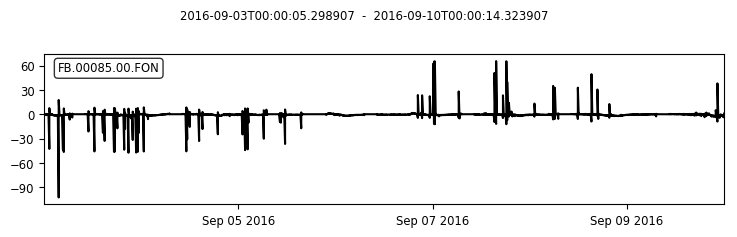

In [27]:
a.plot()